In [124]:
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
sns.set(rc = {'figure.figsize':(15, 7)})
sns.set_style('white')
pd.set_option('display.max_columns', 500)

# ML

In [125]:
lm = LinearRegression()
logis = LogisticRegression()
lasso = Lasso(normalize=True)
ridge = Ridge()
enet = ElasticNet()

In [126]:
features = pd.read_csv('./data/dummified_with_PID.csv', index_col=0) # 2580 x 221
target = pd.read_csv('./data/Ames_Housing_Price_Data.csv')['SalePrice']

features2 = pd.read_csv('./data/features_dummified_376col.csv') # 2558 x 377
target2 = pd.read_csv('./data/target_376col.csv')['SalePrice']

In [127]:
pd.DataFrame({'model': ['lasso', 'ridge', 'elastic net', 'Gradient Boost'],
              'R2_train': [0.903, 0.903, 0.873, 0.998], 
              'R2_test': [0.925, 0.925, 0.893, 0.946], 
              'CV': [10, 10, 10, ''],
              'features': [52, 74, 74, ''],
              'hyperparameters': ['alpha: 11.29, normalize=True', 
                                  'alpha: 16.84, normalize=False',
                                  'alpha: 1.00, normalize=False',
                                  '']
            
            
             })

# seed 84 ==> R2 (0.904 / 0.934)

,model,R2_train,R2_test,CV,features,hyperparameters
0,lasso,0.903,0.925,10,52,"alpha: 11.29, normalize=True"
1,ridge,0.903,0.925,10,74,"alpha: 16.84, normalize=False"
2,elastic net,0.873,0.893,10,74,"alpha: 1.00, normalize=False"
3,Gradient Boost,0.998,0.946,,,


## Models

In [128]:
# lets start by adding a random state and splitting the dataset

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=44)

In [129]:
# lets start by adding a random seed
np.random.seed(8)

# and lets create our train/test split
X_train, X_test, Y_train, Y_test = train_test_split(features, target)

In [130]:
def grid_fit(model, params, cv):
    
    grid = GridSearchCV(model, params, cv=cv, return_train_score = True)
    ans = grid.fit(X_train, Y_train)
    model = ans.best_estimator_
    return model.fit(X_train, Y_train)
    
def find_coefs(model):
    global coefs
    coefs = {}
    for idx, coef in enumerate(model.coef_):
        if coef == 0:
            continue
        else:
            coefs[features.columns[idx]] = coef

    sig_coefs = [feature[:feature.find('_')] if '_' in feature 
                 else feature for feature in coefs.keys()]
      
    print(f'{model}, \n\
    features: {len(set(sig_coefs))}, \n\
    train score: {model.score(X_train, Y_train)}, \n\
    test score: {model.score(X_test, Y_test)}')

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=61)

In [132]:
params = {'alpha': np.logspace(1e-5, 20, 20),
          'normalize': [True, False]}

fit = grid_fit(lasso, params, cv=10)
find_coefs(fit)

Lasso(alpha=11.288625163824443, normalize=True), 
    features: 54, 
    train score: 0.9099991098181985, 
    test score: 0.9151675166817984


In [119]:
# not the final model, but will use this in the meantime
np.array(list(coefs.values())).dot(np.array(features[coefs.keys()].iloc[0])) 

feats = pd.Index(coefs.keys(), name='feats')
predict = pd.DataFrame({'coefs': coefs.values()}, index = feats)
predict.to_csv('./data/final_predictions.csv')

In [123]:
features[list(coefs.keys())].to_csv('./data/final_features.csv')

In [12]:
params = {'alpha': np.logspace(1e-5, 20, 20),
          'normalize': [True, False]}

for i in range(1, 100):
    X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=i)

    fit = grid_fit(lasso, params, cv=10)
    print(f'seed {i}:')
    find_coefs(fit)

seed 1:
Lasso(alpha=127.43012386851292, normalize=False), 
    features: 57, 
    train score: 0.9071523515126109, 
    test score: 0.8981417485311569
seed 2:
Lasso(alpha=127.43012386851292, normalize=False), 
    features: 62, 
    train score: 0.9093352539452192, 
    test score: 0.9000504326942431
seed 3:
Lasso(alpha=127.43012386851292, normalize=False), 
    features: 59, 
    train score: 0.9107683132482142, 
    test score: 0.8889170355485048
seed 4:
Lasso(alpha=127.43012386851292, normalize=False), 
    features: 58, 
    train score: 0.9071156783432228, 
    test score: 0.9002747008836893
seed 5:
Lasso(alpha=127.43012386851292, normalize=False), 
    features: 60, 
    train score: 0.9047245710335444, 
    test score: 0.9057313791800895
seed 6:
Lasso(alpha=127.43012386851292, normalize=False), 
    features: 56, 
    train score: 0.9057376238309193, 
    test score: 0.8192405149920349
seed 7:
Lasso(alpha=127.43012386851292, normalize=False), 
    features: 59, 
    train score:

seed 56:
Lasso(alpha=11.288625163824443, normalize=True), 
    features: 51, 
    train score: 0.9278346296908964, 
    test score: 0.8614229367992604
seed 57:
Lasso(alpha=127.43012386851292, normalize=False), 
    features: 61, 
    train score: 0.9054283019857161, 
    test score: 0.9070726533352598
seed 58:
Lasso(alpha=127.43012386851292, normalize=False), 
    features: 58, 
    train score: 0.9076519567103304, 
    test score: 0.9010749679588222
seed 59:
Lasso(alpha=127.43012386851292, normalize=False), 
    features: 60, 
    train score: 0.9128070517010642, 
    test score: 0.8865138710353582
seed 60:
Lasso(alpha=127.43012386851292, normalize=False), 
    features: 62, 
    train score: 0.90634090396224, 
    test score: 0.9051185069394572
seed 61:
Lasso(alpha=11.288625163824443, normalize=True), 
    features: 56, 
    train score: 0.9100100832917755, 
    test score: 0.9152104659018435
seed 62:
Lasso(alpha=127.43012386851292, normalize=False), 
    features: 57, 
    train sco

In [21]:
params = {'alpha': np.logspace(1e-5, 20, 20),
          'normalize': [True, False]}

fit = grid_fit(lasso, params, cv=10)
find_coefs(fit)

Lasso(alpha=11.288625163824443, normalize=True), 
    features: 56, 
    train score: 0.9100100832917755, 
    test score: 0.9152104659018435


In [468]:
params = {'alpha': np.logspace(1e-5, 20, 20),
          'normalize': [True, False]}

fit = grid_fit(ridge, features, target, paramDict, cv=10)
find_coefs(fit, features)

Ridge(alpha=11.288625163824443, normalize=False), 
    features: 74, 
    train score: 0.903958459020157, 
    test score: 0.9251548646005633


In [469]:
params = {'alpha': np.logspace(1e-5, 20, 20),
          'normalize': [True, False]}

fit = grid_fit(enet, features, target, paramDict, cv=10)
find_coefs(fit, features)

ElasticNet(alpha=1.0000230261160268, normalize=False), 
    features: 74, 
    train score: 0.873357825925452, 
    test score: 0.8932863206215859


In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

params = {
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}

fit = grid_fit(tree_model, features, target, grid_para_tree)

<AxesSubplot:xlabel='SalePrice'>

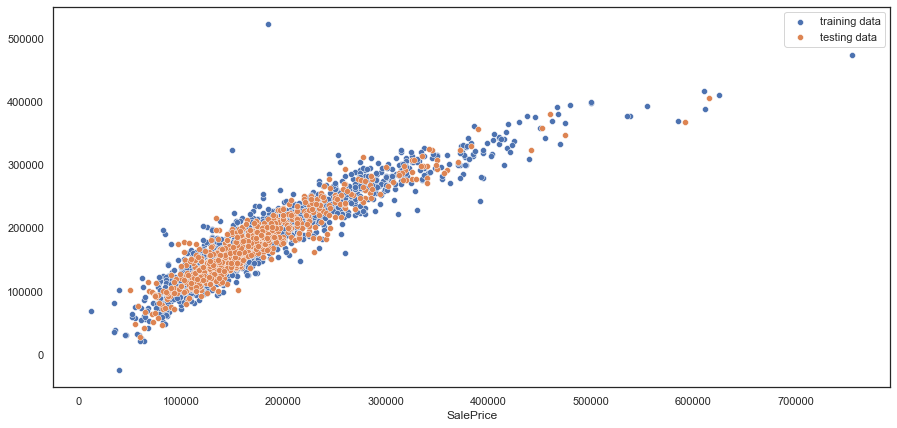

In [205]:
sns.scatterplot(Y_train, lasso.predict(X_train), label='training data')
sns.scatterplot(Y_test, lasso.predict(X_test), label='testing data')

In [219]:
selected_features = features[['OverallQual', 'ExterQual', 'BsmtQual', 'BsmtExposure', 
                             'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 
                             'GrLivArea', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 
                             '1stFlrSF', 'GarageArea', 'Neighborhood_NridgHt', 'Foundation_PConc', 
                             'SaleCondition_Partial', 'CrimeRate', 'HomeAge', 'LastRemod']]
selected_features

,OverallQual,ExterQual,BsmtQual,BsmtExposure,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GrLivArea,LotArea,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GarageArea,Neighborhood_NridgHt,Foundation_PConc,SaleCondition_Partial,CrimeRate,HomeAge,LastRemod
0,6,2,3,1,3,1,4,1,856,7890,0.0,238.0,856.0,856,399.0,0,0,0,5,71,60
1,5,3,4,2,4,0,0,3,1049,4235,149.0,552.0,1049.0,1049,266.0,0,0,0,1,25,25
2,5,3,3,1,4,0,0,1,1001,6060,0.0,737.0,837.0,1001,216.0,0,0,0,0,77,0
3,4,3,2,1,3,0,0,1,1039,8146,0.0,0.0,405.0,717,281.0,0,0,0,0,109,6
4,8,3,4,1,4,0,0,3,1665,8400,0.0,643.0,810.0,810,528.0,0,1,0,1,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,6,2,3,1,2,1,4,1,952,8854,0.0,0.0,952.0,952,192.0,0,0,0,0,93,59
2576,3,2,0,0,3,1,4,1,1733,13680,0.0,0.0,0.0,1733,452.0,0,0,0,1,54,54
2577,5,2,3,1,3,0,0,1,2002,6270,0.0,284.0,1001.0,1001,871.0,0,0,0,5,58,57
2578,7,3,4,1,4,1,3,3,1842,8826,144.0,841.0,985.0,985,486.0,0,1,0,1,7,7


In [414]:
features2.columns

Index(['Alley_No_Alley', 'Alley_Pave', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'BsmtCond_Fa', 'BsmtCond_Gd',
       'BsmtCond_No_Basement', 'BsmtCond_Po',
       ...
       'ScndFlrSF', 'ScreenPorch', 'ThreeSsnPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'CrimeRate', 'SchoolQuality', 'HomeAge',
       'LastRemod'],
      dtype='object', length=376)

In [421]:
# grid search with tree
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

X_train, X_test, Y_train, Y_test = train_test_split(features, target)

paramDict = {'criterion': ['gini', 'entropy'], 
             'max_depth': range(1, 31)}
grid = GridSearchCV(tree_model, param_grid=paramDict, cv=10, return_train_score = True)
ans = grid.fit(X_train, Y_train)

model = ans.best_estimator_
model.fit(X_train, Y_train)

coefs = {}

for idx, coef in enumerate(model.coef_):
    if coef == 0:
        continue
    else:
        coefs[features.columns[idx]] = coef

sig_coefs = [feature[:feature.find('_')] if '_' in feature 
             else feature for feature in coefs.keys()]

print(f'estimators: {model}, features: {len(set(sig_coefs))}, \
 train score: {model.score(X_train, Y_train)}, \
 test score: {model.score(X_test, Y_test)}')

# print(coefs.keys())

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target)
logis.fit(X_train, Y_train)
print(logis.score(X_train, Y_train))

In [ ]:
model.

In [379]:
for C in [0.0001, 0.01, 1, 100, 10000, 1000000, 100000000]:
    logistic = LogisticRegression(C=C, solver='liblinear')
    logistic.fit(X_train, Y_train)
    print("C =", C)
    print("Test Score", logistic.score(X_test, Y_test), "\n")

C = 0.0001
Test Score 0.015625 

C = 0.01
Test Score 0.015625 

C = 1
Test Score 0.015625 

C = 100
Test Score 0.015625 

C = 10000
Test Score 0.015625 

C = 1000000
Test Score 0.015625 

C = 100000000
Test Score 0.015625 



In [137]:
pd.read_csv("./data/home_flipping.csv")

FileNotFoundError: [Errno 2] No such file or directory: './data/home_flipping.csv'